In [1]:
from tensorflow.keras.layers import (Input, Dense,Activation, BatchNormalization, Conv1D, Conv2D,MaxPooling1D, MaxPooling2D, LSTM, GRU, Embedding, Bidirectional,
                         Concatenate,Dropout, Embedding,Convolution1D, Flatten,Layer)
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import initializers
from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras import backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
# Performance:
from sklearn.metrics import (confusion_matrix, classification_report, matthews_corrcoef, precision_score)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)
# import pydot_ng as pydot
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical as labelEncoding   # Usages: Y = labelEncoding(Y, dtype=int)
from tensorflow.keras.utils import plot_model,model_to_dot  

from sklearn.metrics import (confusion_matrix, classification_report, matthews_corrcoef, precision_score, roc_curve, auc)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)
from layers import MultiHeadAttention,Attention,AttLayer
from scipy import interp
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score,accuracy_score,recall_score,matthews_corrcoef,confusion_matrix,roc_curve, precision_recall_curve
import numpy as np
my_seed = 42
np.random.seed(my_seed)
import random 
random.seed(my_seed)
import tensorflow as tf
tf.random.set_seed(my_seed)

In [2]:
def lossPlot(results):
    plt.title(label='Loss: Training and Validation')
    plt.plot(results.history['loss'], label='Training Loss')
    plt.plot(results.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
#end-def

def accuracyPlot(results):
    plt.title(label='Accuracy: Training and Validation')
    plt.plot(results.history['accuracy'], label='Training Accuracy')
    plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
def rocPlot(TPR, meanFPR):
    plt.plot([0,1], [0,1],linestyle = '--',lw = 2,color = 'black')
    meanTPR = np.mean(TPR, axis=0)
    meanAUC = auc(meanFPR, meanTPR)
    plt.plot(meanFPR, meanTPR, color='blue',
            label=r'Mean ROC (AUC = %0.4f )' % (meanAUC),lw=2, alpha=1)

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic Curve (ROC Curve)')
    plt.legend(loc="lower right")
    plt.savefig('ROC-240.png')
    plt.show()

In [5]:
def model1():
    in_put = Input(shape = (100,))
    x = Embedding(input_dim=21,output_dim=100, input_length=100)(in_put)
    a = Convolution1D(128,3,activation='relu',padding='valid')(x)
    a = BatchNormalization()(a)
#     a = MaxPooling1D(pool_size=3, strides=1,padding='valid')(a)
    b = Convolution1D(128,3,activation='relu',padding='valid')(a)
    b = BatchNormalization()(b)
    c = Convolution1D(256,3,activation='relu',padding='valid')(b)
    c = MaxPooling1D(pool_size=3, strides=1,padding='valid')(c)
    c = Dropout(0.2)(c)
    d = Bidirectional(LSTM(128,return_sequences=True))(c)

    head = Flatten()(d)
#     e = Dropout(0.5)(head)
    e = Dense(128, activation='relu', name='FC3')(head)
    e = Dropout(rate=0.5)(e)
    e = Dense(64, activation='relu', name='FC2')(e)
    
    e = Dense(32, activation='relu', name='FC4')(e)
    
    output = Dense(2, activation='softmax', name='Output')(e)

    return Model(inputs = [in_put],outputs = [output])

Epoch 1/100
96/97 [============================>.] - ETA: 0s - loss: 0.6671 - accuracy: 0.5986
Epoch 00001: val_accuracy improved from -inf to 0.52577, saving model to my_model_embeding/our_model_test\firstModel1.tf
97/97 [==============================] - 8s 37ms/step - loss: 0.6664 - accuracy: 0.5995 - val_loss: 0.6876 - val_accuracy: 0.5258
Epoch 2/100
97/97 [==============================] - ETA: 0s - loss: 0.4983 - accuracy: 0.7651
Epoch 00002: val_accuracy did not improve from 0.52577
97/97 [==============================] - 2s 26ms/step - loss: 0.4983 - accuracy: 0.7651 - val_loss: 0.6992 - val_accuracy: 0.4742
Epoch 3/100
97/97 [==============================] - ETA: 0s - loss: 0.3941 - accuracy: 0.8309
Epoch 00003: val_accuracy did not improve from 0.52577
97/97 [==============================] - 3s 26ms/step - loss: 0.3941 - accuracy: 0.8309 - val_loss: 0.7270 - val_accuracy: 0.4742
Epoch 4/100
95/97 [============================>.] - ETA: 0s - loss: 0.3135 - accuracy: 0.8734

Epoch 00028: early stopping
31/31 [==============================] - 0s 16ms/step - loss: 0.8339 - accuracy: 0.8660


C:\Users\c's'z\AppData\Local\Temp/ipykernel_16508/3960842856.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TPR.append(interp(meanFPR, fpr, tpr))


AUC: 0.9392411520884261
Accuracy: [0.8659793734550476]
Sensitivity:  [0.8082474226804124]
Specificity:  [0.9237113402061856]
MCC: [0.7368873046468266]
Precision:  [0.9137529137529138]
Epoch 1/100
97/97 [==============================] - ETA: 0s - loss: 0.6585 - accuracy: 0.6073
Epoch 00001: val_accuracy improved from -inf to 0.52577, saving model to my_model_embeding/our_model_test\firstModel2.tf
97/97 [==============================] - 5s 30ms/step - loss: 0.6585 - accuracy: 0.6073 - val_loss: 0.6889 - val_accuracy: 0.5258
Epoch 2/100
97/97 [==============================] - ETA: 0s - loss: 0.4987 - accuracy: 0.7606
Epoch 00002: val_accuracy improved from 0.52577 to 0.53737, saving model to my_model_embeding/our_model_test\firstModel2.tf
97/97 [==============================] - 2s 25ms/step - loss: 0.4987 - accuracy: 0.7606 - val_loss: 0.6656 - val_accuracy: 0.5374
Epoch 3/100
96/97 [============================>.] - ETA: 0s - loss: 0.3967 - accuracy: 0.8278
Epoch 00003: val_accuracy 

C:\Users\c's'z\AppData\Local\Temp/ipykernel_16508/3960842856.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TPR.append(interp(meanFPR, fpr, tpr))


AUC: 0.9458433414815602
Accuracy: [0.8659793734550476, 0.8793814182281494]
Sensitivity:  [0.8082474226804124, 0.8845360824742268]
Specificity:  [0.9237113402061856, 0.8742268041237113]
MCC: [0.7368873046468266, 0.7588032109349367]
Precision:  [0.9137529137529138, 0.8755102040816326]
Epoch 1/100
96/97 [============================>.] - ETA: 0s - loss: 0.6743 - accuracy: 0.5814
Epoch 00001: val_accuracy improved from -inf to 0.49356, saving model to my_model_embeding/our_model_test\firstModel3.tf
97/97 [==============================] - 5s 33ms/step - loss: 0.6731 - accuracy: 0.5841 - val_loss: 0.6937 - val_accuracy: 0.4936
Epoch 2/100
95/97 [============================>.] - ETA: 0s - loss: 0.5256 - accuracy: 0.7533
Epoch 00002: val_accuracy improved from 0.49356 to 0.63531, saving model to my_model_embeding/our_model_test\firstModel3.tf
97/97 [==============================] - 3s 27ms/step - loss: 0.5252 - accuracy: 0.7548 - val_loss: 0.6622 - val_accuracy: 0.6353
Epoch 3/100
95/97 [==

C:\Users\c's'z\AppData\Local\Temp/ipykernel_16508/3960842856.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TPR.append(interp(meanFPR, fpr, tpr))


AUC: 0.9424550961845041
Accuracy: [0.8659793734550476, 0.8793814182281494, 0.8608247637748718]
Sensitivity:  [0.8082474226804124, 0.8845360824742268, 0.8103092783505155]
Specificity:  [0.9237113402061856, 0.8742268041237113, 0.911340206185567]
MCC: [0.7368873046468266, 0.7588032109349367, 0.725360949477408]
Precision:  [0.9137529137529138, 0.8755102040816326, 0.9013761467889908]
Epoch 1/100
97/97 [==============================] - ETA: 0s - loss: 0.6741 - accuracy: 0.5851
Epoch 00001: val_accuracy improved from -inf to 0.64433, saving model to my_model_embeding/our_model_test\firstModel4.tf
97/97 [==============================] - 5s 30ms/step - loss: 0.6741 - accuracy: 0.5851 - val_loss: 0.6908 - val_accuracy: 0.6443
Epoch 2/100
97/97 [==============================] - ETA: 0s - loss: 0.5313 - accuracy: 0.7436
Epoch 00002: val_accuracy did not improve from 0.64433
97/97 [==============================] - 2s 24ms/step - loss: 0.5313 - accuracy: 0.7436 - val_loss: 0.6786 - val_accuracy:

C:\Users\c's'z\AppData\Local\Temp/ipykernel_16508/3960842856.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TPR.append(interp(meanFPR, fpr, tpr))


AUC: 0.9346519290041448
Accuracy: [0.8659793734550476, 0.8793814182281494, 0.8608247637748718, 0.8649484515190125]
Sensitivity:  [0.8082474226804124, 0.8845360824742268, 0.8103092783505155, 0.8865979381443299]
Specificity:  [0.9237113402061856, 0.8742268041237113, 0.911340206185567, 0.843298969072165]
MCC: [0.7368873046468266, 0.7588032109349367, 0.725360949477408, 0.7305820764085037]
Precision:  [0.9137529137529138, 0.8755102040816326, 0.9013761467889908, 0.849802371541502]
Epoch 1/100
96/97 [============================>.] - ETA: 0s - loss: 0.6732 - accuracy: 0.5908
Epoch 00001: val_accuracy improved from -inf to 0.48840, saving model to my_model_embeding/our_model_test\firstModel5.tf
97/97 [==============================] - 5s 32ms/step - loss: 0.6728 - accuracy: 0.5915 - val_loss: 0.6949 - val_accuracy: 0.4884
Epoch 2/100
96/97 [============================>.] - ETA: 0s - loss: 0.5150 - accuracy: 0.7585
Epoch 00002: val_accuracy improved from 0.48840 to 0.49356, saving model to my_

C:\Users\c's'z\AppData\Local\Temp/ipykernel_16508/3960842856.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TPR.append(interp(meanFPR, fpr, tpr))


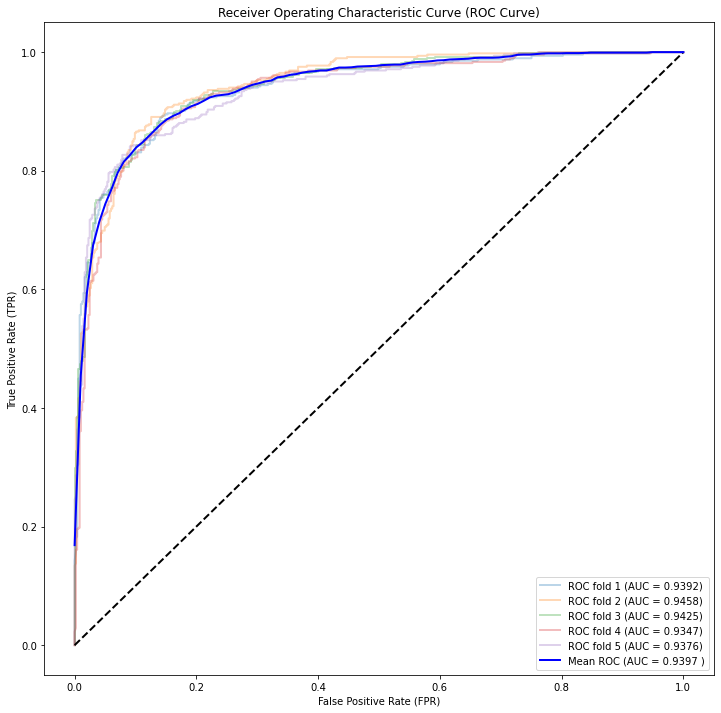

Accuracy [Each Fold]: [0.8659793734550476, 0.8793814182281494, 0.8608247637748718, 0.8649484515190125, 0.861855685710907]
Accuracy: 0.8666
Sensitivity: 0.8334
Specificity: 0.8998
MCC: 0.7372
Precision: 0.8952


In [7]:
if __name__ == '__main__':
    config = tf.compat.v1.ConfigProto()

    config.gpu_options.allow_growth = True

    session = tf.compat.v1.Session(config=config)
    # X1 = np.load('process_data/train/lh_train.npy')
    data1 = np.load('one_hot_data/X_one.npz')
    X1 = data1['x_train']
    X2 = data1['x_test']
    y_1 = pd.read_csv('data/Process_data/train/y_train.csv').to_numpy()
    y1 = labelEncoding(y_1, dtype=int)
    y_2 = pd.read_csv('data/Process_data/test/y_test.csv').to_numpy()
    y2 = labelEncoding(y_2,dtype=int)

    setEpochNumber     = 100 # Performed-welled in epoch 600.50
    setBatchSizeNumber = 32 #26，32
    ####################################################

    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    Accuracy = []
    Sensitivity = []
    Specificity = []
    Precision = []
    MCC = []

    # ROC Curve:
    fig1 = plt.figure(figsize=[12,12])

    TPR = []
    meanFPR = np.linspace(0, 1, 100)

    i = 1

    names = ['first']
    name=names[0]
    nn = 1
    
    for train, test in cv.split(y1):

        # Compile Model:
        model = model1()
        model.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        
        filepath = 'my_model_embeding/our_model_test/%sModel%d.tf' % (name,nn)
        
#         filepath = 'my_model/our_model_7_test/%sModel%d.h5' % (name,nn)
        
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
        callbacks_list = [checkpoint]
        back = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
        # Run Model:
        results = model.fit(x=[X1[train,:]],
                            y=y1[train,:],
                            validation_data=([X1[test,:]],y1[test,:]),
                            batch_size=setBatchSizeNumber, epochs=setEpochNumber,
                            verbose=1,
                            callbacks=[callbacks_list, back])


        nn += 1
        accuracy = model.evaluate(x=[X2],y=y2 )
        Accuracy.append(accuracy[1])

        # Performance Metices:
        Yactual = y_2
        Yp = model.predict([X2])
        v = Yp
        Yp = Yp.argmax(axis=1)

        CM = confusion_matrix(y_pred=Yp, y_true=Yactual)
        TN, FP, FN, TP = CM.ravel()

        MCC.append(matthews_corrcoef(y_true=Yactual, y_pred=Yp))
        Sensitivity.append( TP / (TP + FN) )
        Specificity.append( TN / (TN + FP) )
        Precision.append(precision_score(y_true=Yactual, y_pred=Yp))

        # ROC Curve
        fpr, tpr, _ = roc_curve(Yactual, v[:,1])
        TPR.append(interp(meanFPR, fpr, tpr))
        rocauc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, rocauc))
        i= i+1

        # Performance Plot
#         print('#################################################')
#         print('Fold\'s Accuracy: {:.2f}'.format(accuracy[1]*100.0))
#         lossPlot(results)
#         accuracyPlot(results)
#         print('#################################################')

        print('AUC:',rocauc)
        print('Accuracy:',Accuracy)
        print('Sensitivity: ',Sensitivity)
        print('Specificity: ',Specificity)
        print('MCC:',MCC)
        print('Precision: ',Precision)
        
        

    #end-for

    rocPlot(TPR, meanFPR)

    print('Accuracy [Each Fold]: {}'.format(Accuracy))
    print('Accuracy: {:.4f}'.format(np.sum(Accuracy)/5.0))
    print('Sensitivity: {0:.4f}'.format(np.sum(Sensitivity)/5.00))
    print('Specificity: {0:.4f}'.format(np.sum(Specificity)/5.00))
    print('MCC: {0:.4f}'.format(np.sum(MCC)/5.00))
    print('Precision: {0:.4f}'.format(np.sum(Precision)/5.00))

In [8]:
names = ['first']
for name in names:
    for i in [1,2,3,4,5]:
        model = model1()
        model.load_weights("my_model_embeding/our_model_test/%sModel%d.tf" % (name,i))
        y_tes = y_2
        y_p = model.predict([X2])
        y_pred1 = y_p.argmax(axis=1)
        acc = accuracy_score(y_tes, y_pred1)
        sn = recall_score(y_tes, y_pred1)
        mcc = matthews_corrcoef(y_tes, y_pred1)
        tn, fp, fn, tp = confusion_matrix(y_tes, y_pred1).ravel()
        sp = tn / (tn + fp)
        fpr, tpr, _ = roc_curve(y_tes, y_p[:,1])
        rocauc = auc(fpr, tpr)
#         rocauc = roc_auc_score(y_tes, y_p[:,1])
        aupr = average_precision_score(y_tes, y_pred1)
        f1 = f1_score(y_tes, np.round(y_pred1.reshape(-1)))
        print("ACC : ", acc)
        print("SN : ", sn)
        print("SP : ", sp)
        print("MCC : ", mcc)
        print("AUC : ", rocauc)
        print("AUPR : ", aupr)
        print("f1_score : ", f1)

ACC :  0.8577319587628865
SN :  0.8639175257731959
SP :  0.8515463917525773
MCC :  0.7155186728831076
AUC :  0.934866617068764
AUPR :  0.8052743191886955
f1_score :  0.8586065573770493
ACC :  0.8752577319587629
SN :  0.8577319587628865
SP :  0.8927835051546392
MCC :  0.7509769349287914
AUC :  0.942841959825699
AUPR :  0.8335624284077892
f1_score :  0.8730325288562434
ACC :  0.8917525773195877
SN :  0.8721649484536083
SP :  0.911340206185567
MCC :  0.7841070705494886
AUC :  0.9463046019768308
AUPR :  0.8556037343480377
f1_score :  0.889589905362776


ACC :  0.8701030927835052
SN :  0.8391752577319588
SP :  0.9010309278350516
MCC :  0.7416263223810472
AUC :  0.9364140716335422
AUPR :  0.8310592500283223
f1_score :  0.8659574468085106
ACC :  0.8690721649484536
SN :  0.8371134020618557
SP :  0.9010309278350516
MCC :  0.7396567917069041
AUC :  0.9446572430651504
AUPR :  0.8300513193151369
f1_score :  0.8647497337593184
